<a href="https://colab.research.google.com/github/Nandini-Shivappa/Sentiment-Analysis-of-Amazon-Reviews-/blob/main/Sentiment_analysis_of_Amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This analysis aims to explore a dataset of Amazon customer reviews. The primary goal is to understand the characteristics of the reviews, specifically the distribution of the overall ratings given by customers, and to investigate the sentiment expressed within the text of these reviews. By performing sentiment analysis, we seek to determine if there is a discernible relationship between the sentiment (positive, negative, or neutral) in a review and the corresponding star rating assigned by the customer. The analysis will utilize the NLTK library, particularly its VADER sentiment analysis tool, and briefly introduce the use of the Hugging Face transformers library as an alternative approach for sentiment analysis.

Importing the librabries and reading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

In [ ]:
import nltk  # natural language tool kit. Its developed by Stanford University to facilitate natural language

In [ ]:
# nltk downloads -> downloads the nltk data

nltk.download('punkt')  # punctuations
nltk.download('averaged_perceptron_tagger')  # part of speech tagging
nltk.download('maxent_ne_chunker')   # named entity recognition
nltk.download('words')  # english words
nltk.download('vader_lexicon')  # Valence Aware Dictionary and sentiment Reasoner. Rule based sentiment analysis tool
nltk.download('punkt_tab') # Download the missing punkt_tab resource
nltk.download('averaged_perceptron_tagger_eng') # Download the English version of the averaged perceptron tagger

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
data = pd.read_csv("/content/amazon_reviews.csv")

data.head(10)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.000000
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.000000
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.000000
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.000000
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.000000
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.000000
6,6,2K1Toaster,5.0,I have it in my phone and it never skips a bea...,2013-10-19,415,0,0,0,0,0.0,0.000000
7,7,"35-year Technology Consumer ""8-tracks to 802.11""",5.0,It's hard to believe how affordable digital ha...,2014-10-07,62,0,0,0,0,0.0,0.000000
8,8,4evryoung,5.0,Works in a HTC Rezound. Was running short of ...,2014-03-24,259,1,0,1,1,1.0,0.206549
9,9,53rdcard,5.0,"in my galaxy s4, super fast card, and am total...",2013-11-10,393,0,0,0,0,0.0,0.000000


In [ ]:
data = data.drop(data.columns[0], axis=1)

data.head(10)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.000000
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.000000
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.000000
3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.000000
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.000000
5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.000000
6,2K1Toaster,5.0,I have it in my phone and it never skips a bea...,2013-10-19,415,0,0,0,0,0.0,0.000000
7,"35-year Technology Consumer ""8-tracks to 802.11""",5.0,It's hard to believe how affordable digital ha...,2014-10-07,62,0,0,0,0,0.0,0.000000
8,4evryoung,5.0,Works in a HTC Rezound. Was running short of ...,2014-03-24,259,1,0,1,1,1.0,0.206549
9,53rdcard,5.0,"in my galaxy s4, super fast card, and am total...",2013-11-10,393,0,0,0,0,0.0,0.000000


Step2: Data Analysis for Amazon Reviews

In [ ]:
data['overall'].unique()   # overall column indicies rating

array([4., 5., 3., 1., 2.])

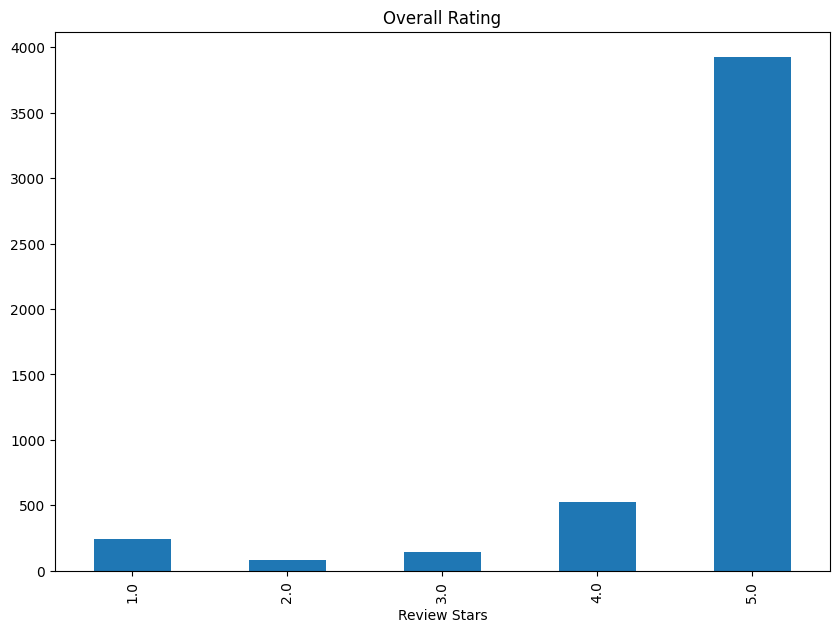

In [ ]:
ax = data['overall'].value_counts().sort_index()\
    .plot(kind='bar', title='Overall Rating', figsize=(10,7))

ax.set_xlabel("Review Stars")
plt.show()


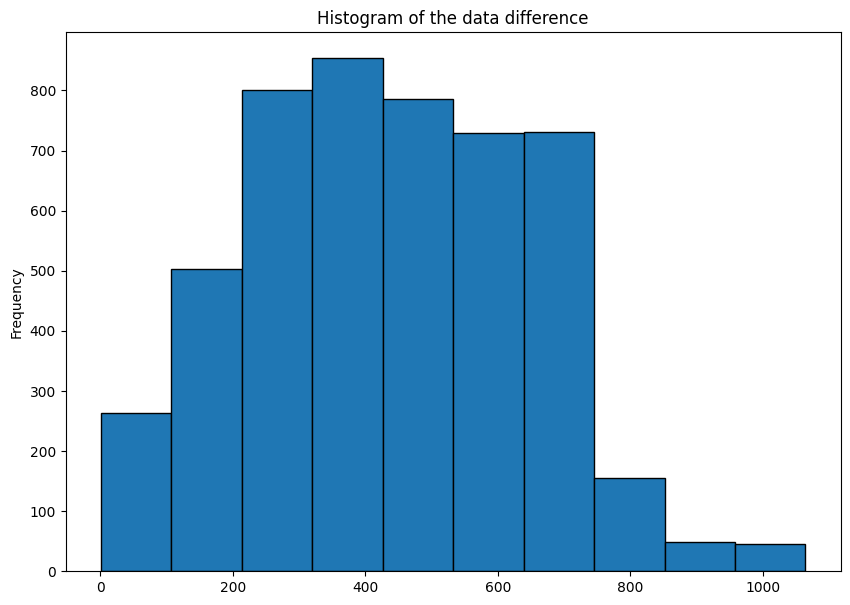

In [ ]:
data['day_diff'].plot(kind='hist', edgecolor='k', bins=10, figsize=(10,7))
plt.title("Histogram of the data difference")
plt.show()

## Basic NLTK

In [ ]:
review = data['reviewText']

In [ ]:
review

,reviewText
0,No issues.
1,"Purchased this for my device, it worked as adv..."
2,it works as expected. I should have sprung for...
3,This think has worked out great.Had a diff. br...
4,"Bought it with Retail Packaging, arrived legit..."
...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...
4911,Used this for extending the capabilities of my...
4912,Great card that is very fast and reliable. It ...
4913,Good amount of space for the stuff I want to d...


In [ ]:
review[3000]

'Plenty of extra storage can load a lot of movies in high definition, music and a boat load of other stuff.'

In [ ]:
example = review[3000]

print(example)

Plenty of extra storage can load a lot of movies in high definition, music and a boat load of other stuff.


In [ ]:
## Tokenization

tokens = nltk.word_tokenize(example)

tokens

['Plenty',
 'of',
 'extra',
 'storage',
 'can',
 'load',
 'a',
 'lot',
 'of',
 'movies',
 'in',
 'high',
 'definition',
 ',',
 'music',
 'and',
 'a',
 'boat',
 'load',
 'of',
 'other',
 'stuff',
 '.']

In [ ]:
## Parts of Speech (POS) tagging

tagging = nltk.pos_tag(tokens)

tagging

[('Plenty', 'NN'),
 ('of', 'IN'),
 ('extra', 'JJ'),
 ('storage', 'NN'),
 ('can', 'MD'),
 ('load', 'VB'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('movies', 'NNS'),
 ('in', 'IN'),
 ('high', 'JJ'),
 ('definition', 'NN'),
 (',', ','),
 ('music', 'NN'),
 ('and', 'CC'),
 ('a', 'DT'),
 ('boat', 'NN'),
 ('load', 'NN'),
 ('of', 'IN'),
 ('other', 'JJ'),
 ('stuff', 'NN'),
 ('.', '.')]

# VADER Sentiment scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the negative(neg)/ netural(neu) / positive (pos) scores of the text.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sa = SentimentIntensityAnalyzer()

In [ ]:
sa.polarity_scores("I am doing good today")

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [ ]:
sa.polarity_scores("I am doing excellent today")

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [ ]:
sa.polarity_scores("This film is too long and boring")

{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.3182}

In [ ]:
sa.polarity_scores("The movie was very bad. bad acting. bad script. bad direction and also lot of violence ")

{'neg': 0.637, 'neu': 0.363, 'pos': 0.0, 'compound': -0.9651}

In [ ]:
## Run this polarity score on the entire dataset

res = {}

for i, row in data.iterrows():
  text = row['reviewText']
  rating = row['overall']
  polarity_scores = sa.polarity_scores(str(text))
  polarity_scores['rating'] = rating
  res[i] = polarity_scores

In [ ]:
res[100]

{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.7096, 'rating': 5.0}

In [ ]:
sentiment_scores = pd.DataFrame(res).T

sentiment_scores = sentiment_scores.reset_index().rename(columns={'index':'id'})

sentiment_scores

,id,neg,neu,pos,compound,rating
0,0,0.688,0.312,0.000,-0.2960,4.0
1,1,0.075,0.925,0.000,-0.2960,5.0
2,2,0.077,0.923,0.000,-0.3089,4.0
3,3,0.000,0.909,0.091,0.7081,5.0
4,4,0.038,0.835,0.127,0.7087,5.0
...,...,...,...,...,...,...
4910,4910,0.091,0.817,0.092,0.0018,1.0
4911,4911,0.000,0.939,0.061,0.1761,5.0
4912,4912,0.000,0.828,0.172,0.8588,5.0
4913,4913,0.000,0.802,0.198,0.4939,5.0


In [ ]:
data['id'] = data.index

data

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,id
0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,0
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,1
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,2
3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,3
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0,4910
4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0,4911
4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0,4912
4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0,4913


In [ ]:
sentiment_with_data = sentiment_scores.merge(data, how='left')

sentiment_with_data

,id,neg,neu,pos,compound,rating,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,0.688,0.312,0.000,-0.2960,4.0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0.075,0.925,0.000,-0.2960,5.0,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,0.077,0.923,0.000,-0.3089,4.0,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,0.000,0.909,0.091,0.7081,5.0,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,0.038,0.835,0.127,0.7087,5.0,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,0.091,0.817,0.092,0.0018,1.0,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,0.000,0.939,0.061,0.1761,5.0,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,0.000,0.828,0.172,0.8588,5.0,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,0.000,0.802,0.198,0.4939,5.0,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


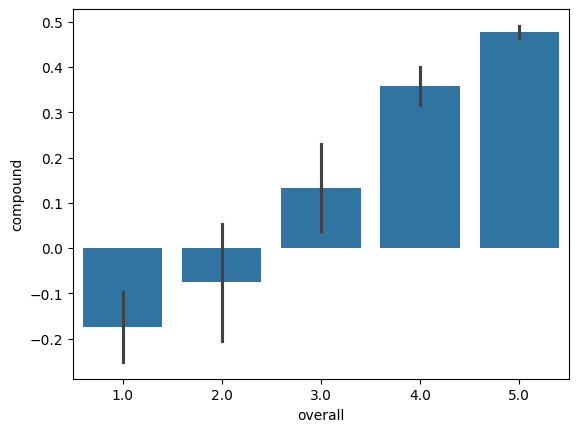

In [ ]:
## Plot the results

ax = sns.barplot(data=sentiment_with_data, x='overall',y='compound')
plt.show()

The compound score is negative for the review rating <=2. For rating >=3 the compound rating score is positive.

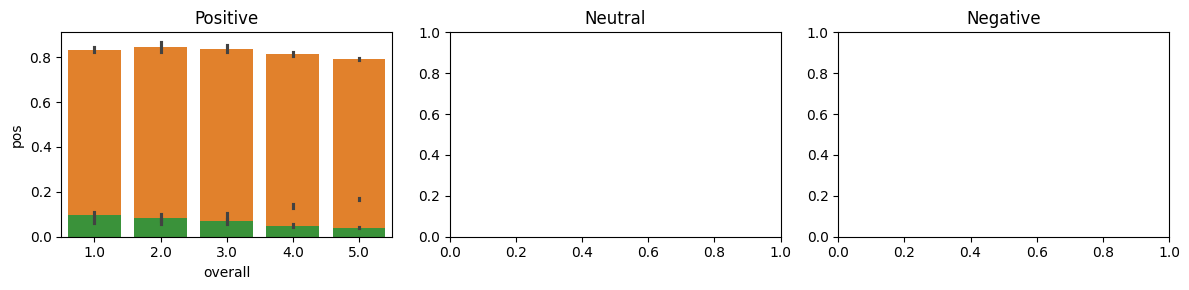

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(12,3))

sns.barplot(data=sentiment_with_data, x='overall', y='pos', ax=axs[0])
sns.barplot(data=sentiment_with_data, x='overall', y='neu', ax=axs[0])
sns.barplot(data=sentiment_with_data, x='overall', y='neg', ax=axs[0])


axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()

<Axes: xlabel='overall', ylabel='neu'>

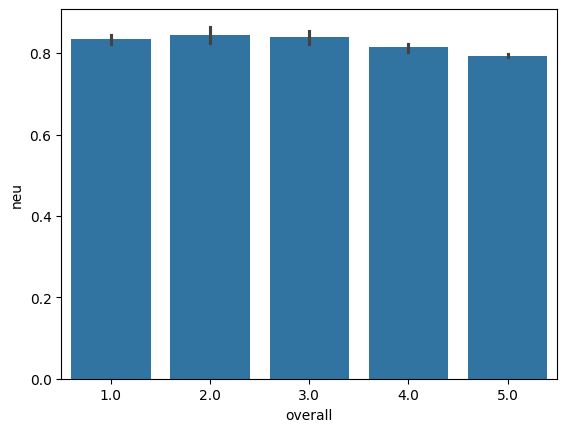

In [ ]:
sns.barplot(data=sentiment_with_data, x='overall', y='neu')

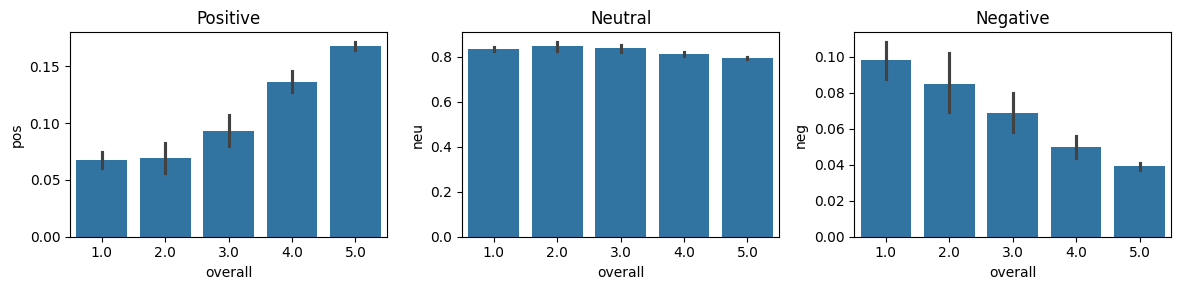

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(12,3))

sns.barplot(data=sentiment_with_data, x='overall', y='pos', ax=axs[0])
sns.barplot(data=sentiment_with_data, x='overall', y='neu', ax=axs[1])
sns.barplot(data=sentiment_with_data, x='overall', y='neg', ax=axs[2])


axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()

Observation: As the rating improves, the positive sentiment in the reviews increases, while the negative sentiment in the reviews decreases. But the neutral sentiment stays almost flat irrespective of the review ratings.

Transformers (huggingface) library to do sentiment analysis

In [ ]:
from transformers import pipeline

sent_analysis_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
sent_analysis_pipeline(' I love Pyhton. Its so easy and convinent')

[{'label': 'POSITIVE', 'score': 0.9985729455947876}]

In [ ]:
sent_analysis_pipeline(' Im doing good today. How about you?')

[{'label': 'POSITIVE', 'score': 0.999761164188385}]

In [ ]:
sent_analysis_pipeline(' This movie is so lengthy and boring')

[{'label': 'NEGATIVE', 'score': 0.9997946619987488}]

# Conclusion

This analysis explored a dataset of Amazon reviews, focusing on understanding the distribution of review ratings and the relationship between these ratings and the sentiment expressed in the review text.

**Review Rating Distribution**: The dataset contains reviews with overall ratings ranging from 1 to 5 stars. Visual inspection of the rating distribution showed that certain star ratings are more frequent than others (the exact distribution shape was visualized but not explicitly described in detail in the markdown).

**Sentiment Analysis with VADER**: Using NLTK's VADER (Valence Aware Dictionary and sentiment Reasoner), sentiment polarity scores (negative, neutral, positive, and compound) were calculated for each review.
The **compound sentiment score** shows a clear correlation with the 'overall' rating. Lower ratings (1 and 2 stars) generally correspond to negative average compound scores, while higher ratings (3, 4, and 5 stars) correspond to positive average compound scores.
Similarly, the analysis of individual sentiment components revealed that as the 'overall' rating increases:
The average **positive** sentiment score significantly **increases**.
The average negative sentiment score significantly decreases.
The average **neutral** sentiment score remains relatively **stable**, showing little change across different rating levels.

This observation aligns with the intuitive understanding that higher customer ratings are associated with more positive language in reviews, and lower ratings with more negative language.

**Introduction to Transformers:**
 The analysis also introduced the use of the Hugging Face transformers library for sentiment analysis as an alternative approach. While a sentiment analysis pipeline was successfully initialized and applied to sample texts, the results for the entire dataset were not fully processed or visualized within the provided code, indicating this as a potential next step for further analysis or comparison.

In summary, the analysis using VADER successfully demonstrated a strong positive correlation between customer review ratings and the positivity of the language used in the reviews, and a strong negative correlation between ratings and negative language. The neutral sentiment component, however, appears largely independent of the assigned star rating.